In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("./data/car_values/car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [33]:
df.drop(columns=['vin', 'seller', 'trim', 'transmission', 'color', 'interior', 'saledate'], inplace=True)
df.head()

,year,make,model,body,state,condition,odometer,mmr,sellingprice
0,2015,Kia,Sorento,SUV,ca,5.0,16639.0,20500.0,21500.0
1,2015,Kia,Sorento,SUV,ca,5.0,9393.0,20800.0,21500.0
2,2014,BMW,3 Series,Sedan,ca,45.0,1331.0,31900.0,30000.0
3,2015,Volvo,S60,Sedan,ca,41.0,14282.0,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,ca,43.0,2641.0,66000.0,67000.0


In [34]:
df.shape

(558837, 9)

In [35]:
df['state'].value_counts()

state
fl                   82945
ca                   73148
pa                   53907
tx                   45913
ga                   34750
                     ...  
3vwd17aj2fm285365        1
3vwd17aj3fm276741        1
3vwd17aj2fm258506        1
3vwd17aj4fm201708        1
3vwd17aj2fm261566        1
Name: count, Length: 64, dtype: int64

In [36]:
df[[len(state) > 2 for state in df['state']]]

,year,make,model,body,state,condition,odometer,mmr,sellingprice
408161,2015,Volkswagen,Jetta,Navitgation,3vwd17aj4fm201708,NaN,46.0,NaN,13200.0
417835,2015,Volkswagen,Jetta,Navitgation,3vwd17aj2fm258506,NaN,1.0,NaN,13300.0
421289,2015,Volkswagen,Jetta,Navitgation,3vwd17aj3fm276741,NaN,46.0,NaN,13200.0
424161,2015,Volkswagen,Jetta,Navitgation,3vwd17aj2fm285365,NaN,1.0,NaN,14050.0
427040,2015,Volkswagen,Jetta,Navitgation,3vwd17aj0fm227318,NaN,41.0,NaN,13700.0
427043,2015,Volkswagen,Jetta,Navitgation,3vwd17aj6fm218641,NaN,49.0,NaN,13850.0
434424,2015,Volkswagen,Jetta,Navitgation,3vwd17aj7fm223475,NaN,46.0,NaN,13650.0
444501,2015,Volkswagen,Jetta,Navitgation,3vwd17aj5fm297123,NaN,2.0,NaN,13850.0
453794,2015,Volkswagen,Jetta,Navitgation,3vwd17aj5fm219943,NaN,44.0,NaN,13600.0
461597,2015,Volkswagen,Jetta,Navitgation,3vwd17aj9fm219766,NaN,44.0,NaN,13900.0


In [37]:
df[np.isnan(df['condition'])].shape[0] / df.shape[0]

0.021151069095281808

Because the entries with strage state values also have NaN for their condition values, and because the number of NaN condition values account for only 2% of the total value, dropping values where the `condition` column is NaN will solve both problems (as condition will likely be a feature for the regression model).

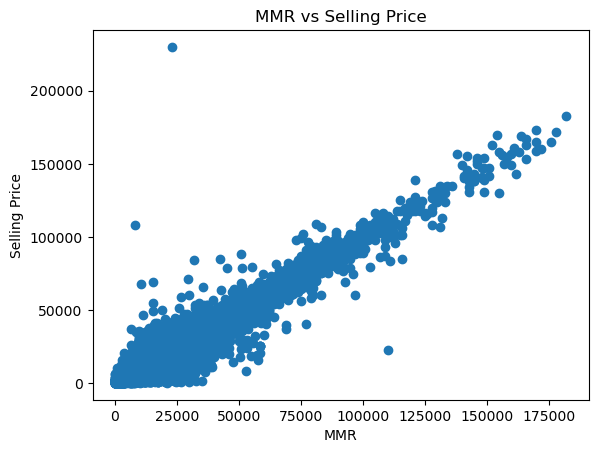

In [39]:
plt.scatter(df['mmr'], df['sellingprice'])
plt.xlabel("MMR")
plt.ylabel("Selling Price")
plt.title("MMR vs Selling Price")
plt.show()

In [40]:
df.dropna(inplace=True)

In [43]:
df.to_csv('./data/car_prices_clean.csv')